1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

    You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
    
    Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

### Import the Data

In [901]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [902]:
pip install scikit-learn

In [903]:
df = pd.read_csv('https://raw.githubusercontent.com/GoldenSnow-Xue/schulich_data_science/main/MBAN%206110/Datasets/kc_house_data.csv')

In [904]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [905]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [906]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Data Cleaning

In [907]:
df.drop(['id'], axis = 1, inplace = True)
df.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


##### Dealing with Outliers

c:\Users\Golden Snow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

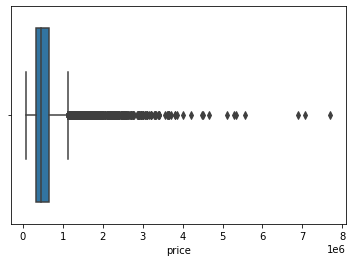

In [908]:
sns.boxplot(df['price'])

In [909]:
drop_price_outliers = df[df['price']>6000000].index
drop_price_outliers

Int64Index([3914, 7252, 9254], dtype='int64')

In [910]:
df.drop(drop_price_outliers, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21610 non-null  object 
 1   price          21610 non-null  float64
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  float64
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  float64
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

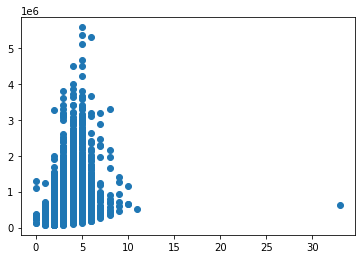

In [911]:
plt.scatter(df['bedrooms'], df['price'])

In [912]:
drop_bedrooms_outliers = df[df['bedrooms']>30].index
drop_bedrooms_outliers

Int64Index([15870], dtype='int64')

In [913]:
df.drop(drop_bedrooms_outliers, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21609 non-null  object 
 1   price          21609 non-null  float64
 2   bedrooms       21609 non-null  int64  
 3   bathrooms      21609 non-null  float64
 4   sqft_living    21609 non-null  int64  
 5   sqft_lot       21609 non-null  int64  
 6   floors         21609 non-null  float64
 7   waterfront     21609 non-null  int64  
 8   view           21609 non-null  int64  
 9   condition      21609 non-null  int64  
 10  grade          21609 non-null  int64  
 11  sqft_above     21609 non-null  int64  
 12  sqft_basement  21609 non-null  int64  
 13  yr_built       21609 non-null  int64  
 14  yr_renovated   21609 non-null  int64  
 15  zipcode        21609 non-null  int64  
 16  lat            21609 non-null  float64
 17  long           21609 non-null  float64
 18  sqft_l

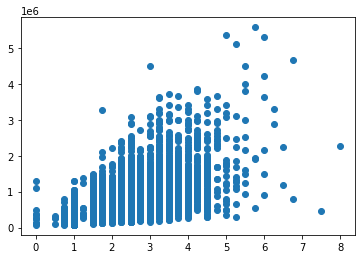

In [914]:
plt.scatter(df['bathrooms'], df['price'])

In [915]:
drop_bathrooms_outliers = df[df['bathrooms']>7].index
drop_bathrooms_outliers

Int64Index([8546, 12777], dtype='int64')

In [916]:
df.drop(drop_bathrooms_outliers, inplace=True)
df_cleaned = df
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21607 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21607 non-null  object 
 1   price          21607 non-null  float64
 2   bedrooms       21607 non-null  int64  
 3   bathrooms      21607 non-null  float64
 4   sqft_living    21607 non-null  int64  
 5   sqft_lot       21607 non-null  int64  
 6   floors         21607 non-null  float64
 7   waterfront     21607 non-null  int64  
 8   view           21607 non-null  int64  
 9   condition      21607 non-null  int64  
 10  grade          21607 non-null  int64  
 11  sqft_above     21607 non-null  int64  
 12  sqft_basement  21607 non-null  int64  
 13  yr_built       21607 non-null  int64  
 14  yr_renovated   21607 non-null  int64  
 15  zipcode        21607 non-null  int64  
 16  lat            21607 non-null  float64
 17  long           21607 non-null  float64
 18  sqft_l

### Exploratory Data Analysis

<module 'matplotlib.pyplot' from 'c:\\Users\\Golden Snow\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

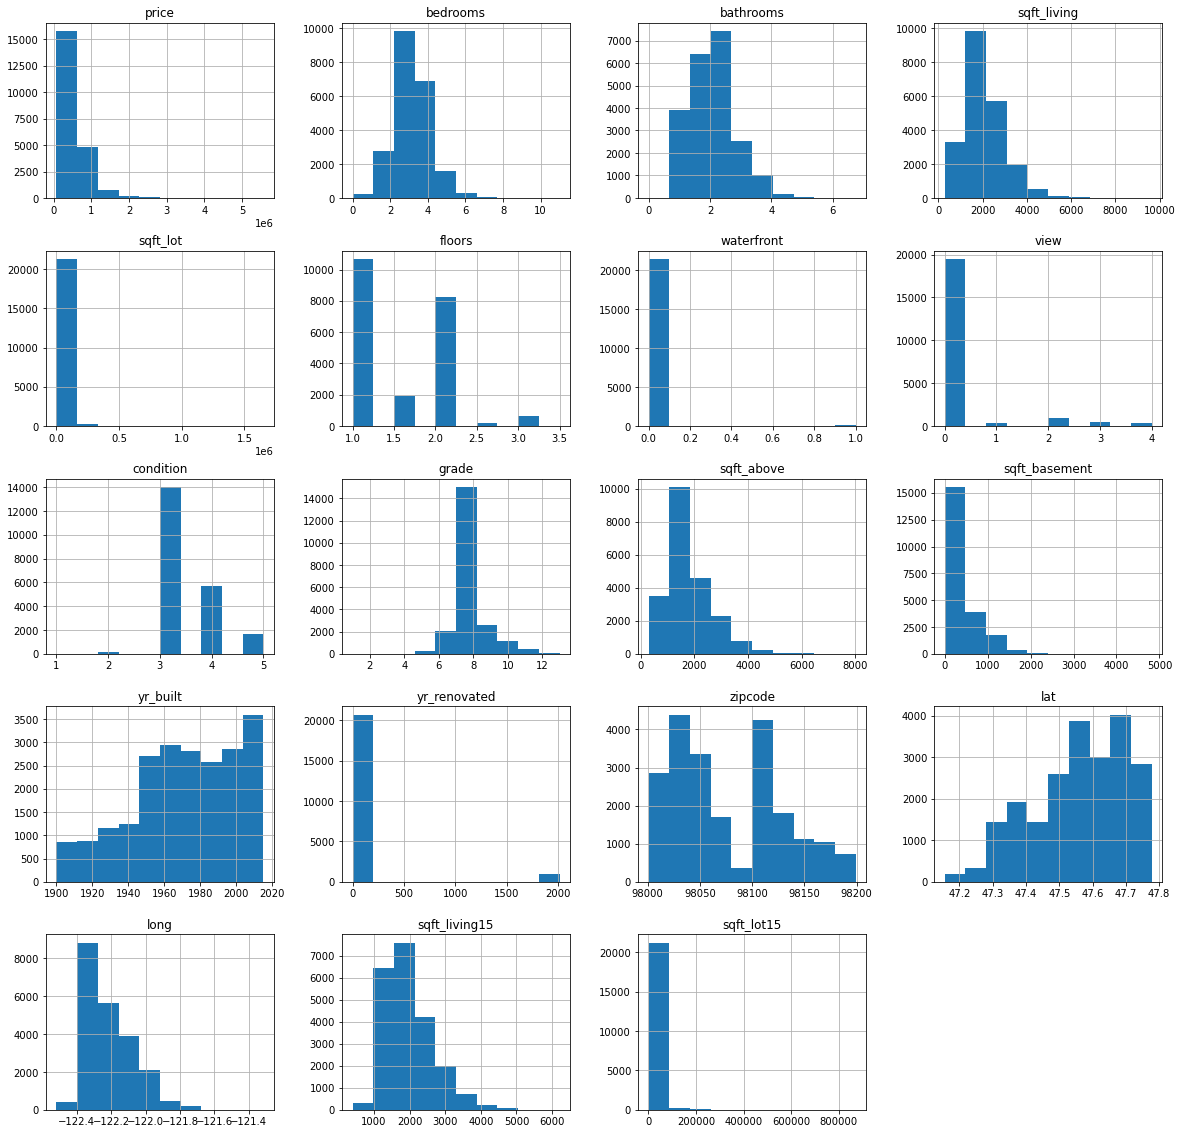

In [917]:
df.hist(figsize=(20, 20))
plt

### Data Transforming

##### Feature Enigneering

###### One-Hot Encoding

c:\Users\Golden Snow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'House Condition and Price')

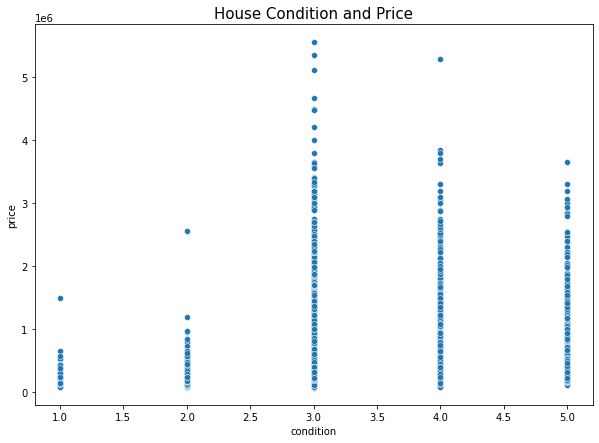

In [918]:
plt.figure(figsize=(10, 7))
sns.scatterplot(df['condition'], df['price'])
plt.title('House Condition and Price', fontsize=15)

###### The above scatterplot shows that 'average' houses tend to perform the best in terms of price.

c:\Users\Golden Snow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'House Condition and Grade')

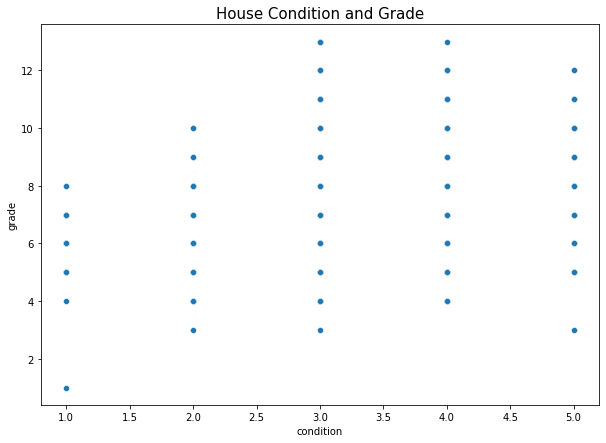

In [919]:
plt.figure(figsize=(10, 7))
sns.scatterplot(df['condition'], df['grade'])
plt.title('House Condition and Grade', fontsize=15)

##### Creating Dummy Variables

In [920]:
dummies_condition = pd.get_dummies(df.condition, dtype=int)

In [921]:
dummies_condition.rename(columns = {1:'Poor', 2:'Fair', 3:'Average', 4:'Good', 5:'Perfect'}, inplace= True)

In [922]:
df = pd.concat([df, dummies_condition], axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,Poor,Fair,Average,Good,Perfect
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,0,0,1,0,0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,0,0,1,0,0
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,0,0,1,0,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,0,0,0,0,1
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,98103,47.6993,-122.346,1530,1509,0,0,1,0,0
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,98146,47.5107,-122.362,1830,7200,0,0,1,0,0
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,98144,47.5944,-122.299,1020,2007,0,0,1,0,0
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,98027,47.5345,-122.069,1410,1287,0,0,1,0,0


In [923]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21607 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21607 non-null  object 
 1   price          21607 non-null  float64
 2   bedrooms       21607 non-null  int64  
 3   bathrooms      21607 non-null  float64
 4   sqft_living    21607 non-null  int64  
 5   sqft_lot       21607 non-null  int64  
 6   floors         21607 non-null  float64
 7   waterfront     21607 non-null  int64  
 8   view           21607 non-null  int64  
 9   condition      21607 non-null  int64  
 10  grade          21607 non-null  int64  
 11  sqft_above     21607 non-null  int64  
 12  sqft_basement  21607 non-null  int64  
 13  yr_built       21607 non-null  int64  
 14  yr_renovated   21607 non-null  int64  
 15  zipcode        21607 non-null  int64  
 16  lat            21607 non-null  float64
 17  long           21607 non-null  float64
 18  sqft_l

### Assess Linear relationships

In [924]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.699012
grade            0.673564
sqft_above       0.601721
sqft_living15    0.591324
bathrooms        0.523435
view             0.397196
sqft_basement    0.318917
bedrooms         0.316295
lat              0.312901
waterfront       0.264186
floors           0.259267
yr_renovated     0.121469
sqft_lot         0.089313
sqft_lot15       0.081725
Perfect          0.059780
yr_built         0.057120
condition        0.037565
long             0.022665
Average          0.007203
Poor            -0.021290
Good            -0.031889
Fair            -0.052932
zipcode         -0.053050
Name: price, dtype: float64

<AxesSubplot:>

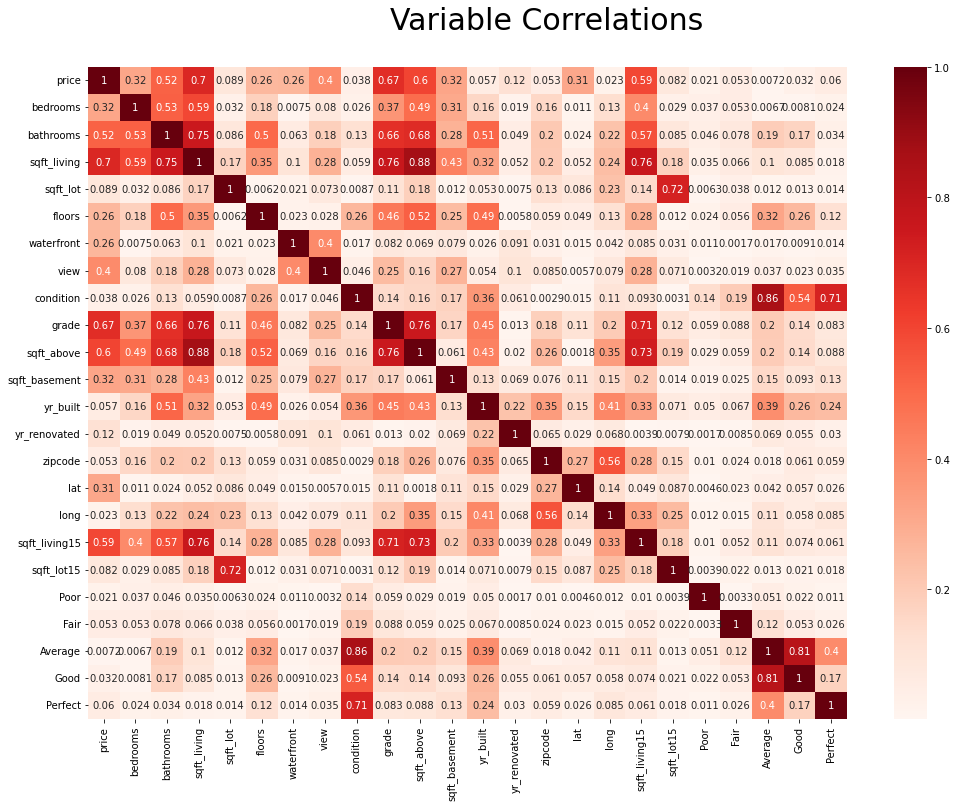

In [925]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
heatmap

### Ordinary Least Squares Regression

In [926]:
results = ols("price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms + view + sqft_basement + bedrooms + lat", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     4892.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:32:07   Log-Likelihood:            -2.9583e+05
No. Observations:               21607   AIC:                         5.917e+05
Df Residuals:                   21598   BIC:                         5.918e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -3.17e+07   5.08e+05    -62.425

In [927]:
pred_vals = results.predict(df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',  'view', 'sqft_basement', 'bedrooms', 'lat']])
pred_vals

0        279572.292770
1        666913.817366
2        316891.474687
3        390707.592853
4        514683.155283
             ...      
21608    532552.777083
21609    527227.786090
21610    331562.585205
21611    435439.951590
21612    331365.065098
Length: 21607, dtype: float64

In [928]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)
res

,y_hat,price
0,279572.292770,221900.0
1,666913.817366,538000.0
2,316891.474687,180000.0
3,390707.592853,604000.0
4,514683.155283,510000.0
...,...,...
21608,532552.777083,360000.0
21609,527227.786090,400000.0
21610,331562.585205,402101.0
21611,435439.951590,400000.0


In [929]:
res['error'] = res['y_hat'] - res['price']
res.head(5)

,y_hat,price,error
0,279572.292770,221900.0,57672.292770
1,666913.817366,538000.0,128913.817366
2,316891.474687,180000.0,136891.474687
3,390707.592853,604000.0,-213292.407147
4,514683.155283,510000.0,4683.155283


In [930]:
res['sq_error'] = res['error'] ** 2

In [931]:
np.sqrt(res['sq_error'].mean())

213742.95183571402

In [932]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,Poor,Fair,Average,Good,Perfect
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,...,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.390803e+05,3.368723,2.113609,2078.108159,1.509188e+04,1.494145,0.007498,0.233767,3.409404,7.656084,...,98077.940853,47.560029,-122.213891,1986.176748,12757.962096,0.001388,0.007960,0.649188,0.262785,0.078678
std,3.584312e+05,0.906521,0.766177,909.472458,4.137779e+04,0.539880,0.086265,0.765238,0.650707,1.173888,...,53.506756,0.138575,0.140834,684.708320,27271.286828,0.037237,0.088867,0.477235,0.440157,0.269242
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,98033.000000,47.470850,-122.328000,1490.000000,5100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,5.570000e+06,11.000000,6.750000,9640.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([3.0000e+00, 2.0000e+00, 1.1000e+01, 3.1000e+01, 6.5000e+01,
        2.5600e+02, 2.4460e+03, 1.8045e+04, 7.4000e+02, 8.0000e+00]),
 array([-3306075.59817436, -2855674.13768909, -2405272.67720383,
        -1954871.21671856, -1504469.75623329, -1054068.29574803,
         -603666.83526276,  -153265.37477749,   297136.08570777,
          747537.54619304,  1197939.00667831]),
 <BarContainer object of 10 artists>)

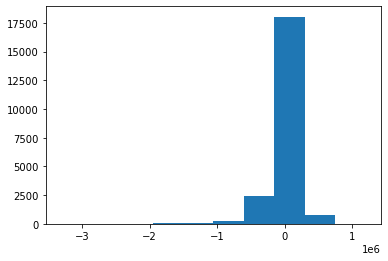

In [933]:
plt.hist(res['error'])

(array([1.5785e+04, 4.7700e+03, 7.1900e+02, 1.9200e+02, 7.7000e+01,
        4.1000e+01, 1.4000e+01, 2.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([  75000.,  624500., 1174000., 1723500., 2273000., 2822500.,
        3372000., 3921500., 4471000., 5020500., 5570000.]),
 <BarContainer object of 10 artists>)

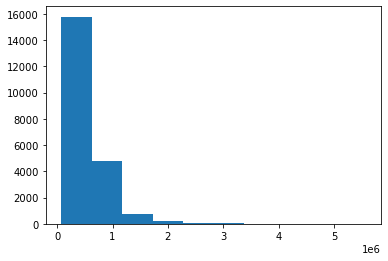

In [934]:
plt.hist(df['price'])

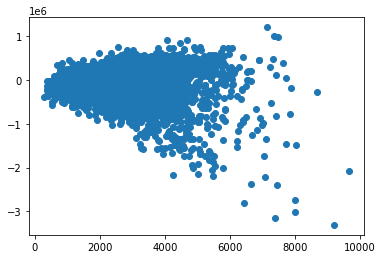

In [935]:
plt.scatter(df['sqft_living'], res['error'])

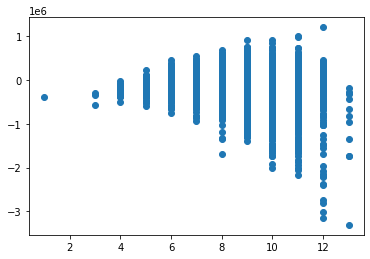

In [936]:
plt.scatter(df['grade'], res['error'])

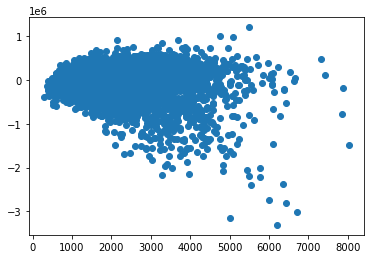

In [937]:
plt.scatter(df['sqft_above'], res['error'])

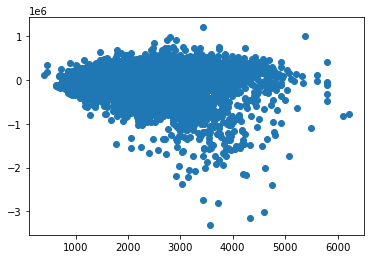

In [938]:
plt.scatter(df['sqft_living15'], res['error'])

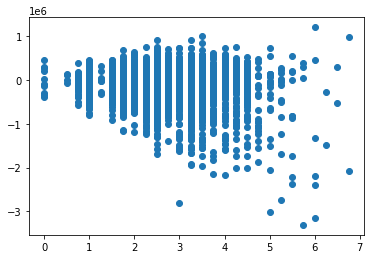

In [939]:
plt.scatter(df['bathrooms'], res['error'])

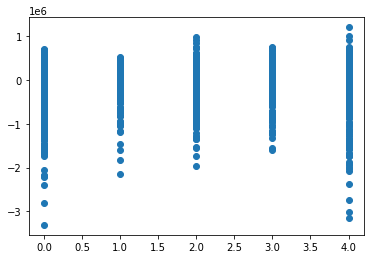

In [940]:
plt.scatter(df['view'], res['error'])

((array([-3.99696983, -3.78174326, -3.66401218, ...,  3.66401218,
          3.78174326,  3.99696983]),
  array([-3306075.59817436, -3147376.89938605, -3019419.58977456, ...,
           983292.10571052,  1009776.96072994,  1197939.00667831])),
 (191995.76065994415, -1.4423410993830098e-08, 0.8980954666437031))

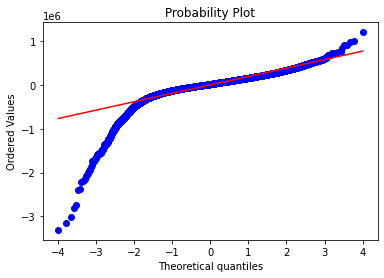

In [941]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [942]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_sqft_living  dfb_grade  dfb_sqft_above  \
0          -0.000656         0.000214  -0.001331       -0.000259   
1           0.005271        -0.007528   0.006358       -0.006346   
2           0.006104         0.005894   0.007437        0.004102   
3           0.002149        -0.000900  -0.002119       -0.009455   
4           0.000055         0.000071  -0.000119        0.000041   
...              ...              ...        ...             ...   
21608       0.005493         0.006248  -0.004294        0.001860   
21609      -0.000978         0.000706  -0.000879       -0.002875   
21610      -0.000338         0.001158   0.002017        0.001119   
21611      -0.000233         0.000939  -0.001087        0.000267   
21612       0.000030        -0.000134  -0.000182       -0.000069   

       dfb_sqft_living15  dfb_bathrooms      dfb_view  dfb_sqft_basement  \
0               0.000985       0.002388 -4.815305e-05           0.000492   
1               0.003733      -

In [943]:
infl.summary_frame()

,dfb_Intercept,dfb_sqft_living,dfb_grade,dfb_sqft_above,dfb_sqft_living15,dfb_bathrooms,dfb_view,dfb_sqft_basement,dfb_bedrooms,dfb_lat,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.000656,0.000214,-0.001331,-0.000259,0.000985,0.002388,-4.815305e-05,0.000492,-0.000916,0.000661,1.402547e-06,-0.269791,0.000193,-0.003745,-0.269785,-0.003745
1,0.005271,-0.007528,0.006358,-0.006346,0.003733,-0.000686,1.065289e-03,-0.001505,0.004815,-0.005463,1.333753e-05,-0.603110,0.000367,-0.011549,-0.603102,-0.011549
2,0.006104,0.005894,0.007437,0.004102,-0.015913,-0.000115,1.326520e-03,0.002098,0.003231,-0.006260,3.727154e-05,-0.640606,0.000907,-0.019306,-0.640598,-0.019306
3,0.002149,-0.000900,-0.002119,-0.009455,-0.004485,0.013075,-2.236609e-03,0.007582,0.002326,-0.002116,4.186546e-05,0.997894,0.000420,0.020461,0.997894,0.020461
4,0.000055,0.000071,-0.000119,0.000041,0.000036,-0.000009,2.228683e-05,0.000109,0.000006,-0.000053,5.406394e-09,-0.021907,0.000113,-0.000233,-0.021906,-0.000233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.005493,0.006248,-0.004294,0.001860,0.003527,-0.006689,3.162988e-05,0.004437,0.000498,-0.005403,1.714175e-05,-0.807229,0.000263,-0.013093,-0.807223,-0.013093
21609,-0.000978,0.000706,-0.000879,-0.002875,0.003254,-0.000914,2.471101e-04,0.003287,-0.002551,0.001005,5.180572e-06,-0.595157,0.000146,-0.007198,-0.595148,-0.007198
21610,-0.000338,0.001158,0.002017,0.001119,-0.002633,-0.003222,-3.591812e-06,0.000189,-0.001519,0.000355,3.416254e-06,0.329998,0.000314,0.005845,0.329991,0.005845
21611,-0.000233,0.000939,-0.001087,0.000267,0.001145,-0.001220,4.035498e-05,0.000714,0.000218,0.000249,6.302773e-07,-0.165791,0.000229,-0.002511,-0.165787,-0.002510


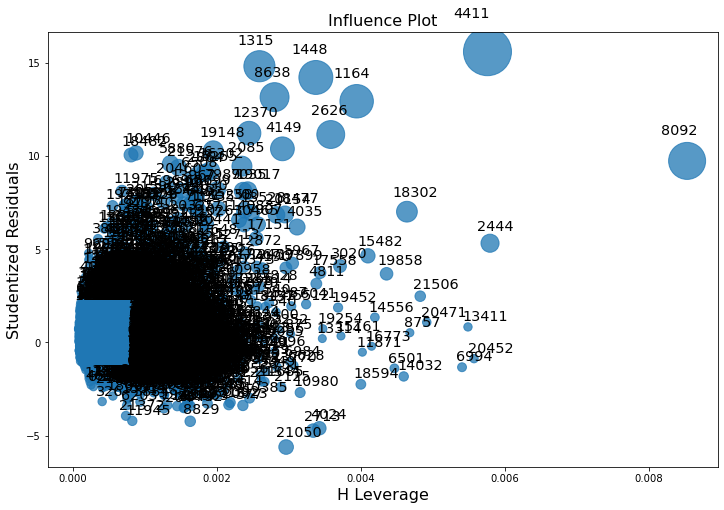

In [944]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [945]:
df.drop([1315, 1448, 8638, 1164, 2626, 4411, 8092], inplace=True)

In [946]:
res

,y_hat,price,error,sq_error
0,279572.292770,221900.0,57672.292770,3.326093e+09
1,666913.817366,538000.0,128913.817366,1.661877e+10
2,316891.474687,180000.0,136891.474687,1.873928e+10
3,390707.592853,604000.0,-213292.407147,4.549365e+10
4,514683.155283,510000.0,4683.155283,2.193194e+07
...,...,...,...,...
21608,532552.777083,360000.0,172552.777083,2.977446e+10
21609,527227.786090,400000.0,127227.786090,1.618691e+10
21610,331562.585205,402101.0,-70538.414795,4.975668e+09
21611,435439.951590,400000.0,35439.951590,1.255990e+09


In [947]:
results2 = ols("price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms + view + sqft_basement + bedrooms + lat", data=df).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     4943.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:45:09   Log-Likelihood:            -2.9510e+05
No. Observations:               21600   AIC:                         5.902e+05
Df Residuals:                   21591   BIC:                         5.903e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.164e+07   4.93e+05    -64.147

In [948]:
pred_vals2 = results2.predict(df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',  'view', 'sqft_basement', 'bedrooms', 'lat']])
pred_vals2

0        284010.530077
1        655301.169416
2        332433.159946
3        389403.507818
4        517327.539033
             ...      
21608    535464.994883
21609    525190.909641
21610    332184.640062
21611    436726.512103
21612    331987.563269
Length: 21600, dtype: float64

In [949]:
res2 = pd.concat([pred_vals2.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)
res2

,y_hat,price
0,284010.530077,221900.0
1,655301.169416,538000.0
2,332433.159946,180000.0
3,389403.507818,604000.0
4,517327.539033,510000.0
...,...,...
21608,535464.994883,360000.0
21609,525190.909641,400000.0
21610,332184.640062,402101.0
21611,436726.512103,400000.0


In [950]:
res2['error'] = res2['y_hat'] - res2['price']
res2.head(5)

,y_hat,price,error
0,284010.530077,221900.0,62110.530077
1,655301.169416,538000.0,117301.169416
2,332433.159946,180000.0,152433.159946
3,389403.507818,604000.0,-214596.492182
4,517327.539033,510000.0,7327.539033


In [951]:
res2['sq_error'] = res2['error'] ** 2

In [952]:
np.sqrt(res2['sq_error'].mean())

207578.28136697522

##### Separate Features and Target

In [980]:
categorical_features = ['grade', 'bathrooms', 'view', 'bedrooms']
numerical_features = ['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_basement', 'lat']
target = 'price'

In [981]:
df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms', 'sqft_basement', 'lat' ]]

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,sqft_basement,lat
0,1180,7,1180,1340,1.00,0,3,0,47.5112
1,2570,7,2170,1690,2.25,0,3,400,47.7210
2,770,6,770,2720,1.00,0,2,0,47.7379
3,1960,7,1050,1360,3.00,0,4,910,47.5208
4,1680,8,1680,1800,2.00,0,3,0,47.6168
...,...,...,...,...,...,...,...,...,...
21608,1530,8,1530,1530,2.50,0,3,0,47.6993
21609,2310,8,2310,1830,2.50,0,4,0,47.5107
21610,1020,7,1020,1020,0.75,0,2,0,47.5944
21611,1600,8,1600,1410,2.50,0,3,0,47.5345


In [982]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

##### Split data in train/test

In [983]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features], df[target], test_size = 0.3, random_state=1234)

##### Define transformers

In [984]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

##### Building Processor

In [985]:
preprocessor = ColumnTransformer(transformers = [('cat', cat_transformer, categorical_features),('num', num_transformer, numerical_features)])

In [986]:
from sklearn.metrics import mean_squared_error

### Ridge 

In [987]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [988]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'bathrooms', 'view',
                                                   'bedrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_above',
                                                   'sqft_living15',
                                                   'sqft_basement', 'lat'])])),
                ('regressor', Ridge(alpha=3.0))])

In [989]:
pred_ridge = ridge_regression.predict(X_test)

In [990]:
ridge_r2 = r2_score(pred_ridge, y_test)
ridge_r2

0.5734120615154953

In [991]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

189176.1123911571

### Lasso

In [992]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [993]:
lasso_regression.fit(X_train, y_train)

c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15498680886238.375, tolerance: 189156179152.35132
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'bathrooms', 'view',
                                                   'bedrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_above',
                                                   'sqft_living15',
                                                   'sqft_basement', 'lat'])])),
                ('regressor', Lasso())])

In [994]:
lasso_pred = lasso_regression.predict(X_test)

In [995]:
lasso_r2 = r2_score(lasso_pred, y_test)
lasso_r2

0.5746998588413338

In [996]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

189761.834063182

### Elastic Net

In [997]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [998]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'bathrooms', 'view',
                                                   'bedrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_above',
                                                   'sqft_living15',
                                                   'sqft_basement', 'lat'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [999]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [1000]:
elasticnet_r2 = r2_score(elasticnet_pred, y_test)
elasticnet_r2

0.28342655890892077

In [1001]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

210152.16026467335

In [1002]:
y_test

17353    919000.0
18095    718000.0
17273    305000.0
13596    515000.0
15175    350000.0
           ...   
5330     285000.0
2372     254000.0
10370    429000.0
13082    358000.0
33       535000.0
Name: price, Length: 6480, dtype: float64

In [1003]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [1004]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']

In [1005]:
X_test

,grade,bathrooms,view,bedrooms,sqft_living,sqft_above,sqft_living15,sqft_basement,lat
17353,10,2.50,4,4,3620,2220,3530,1400,47.5604
18095,7,1.00,0,3,1030,1030,2230,0,47.6647
17273,7,1.75,0,4,2370,1460,1450,910,47.3352
13596,8,1.75,0,2,1930,1930,1810,0,47.7173
15175,8,1.50,0,2,1070,1070,1100,0,47.6761
...,...,...,...,...,...,...,...,...,...
5330,7,1.50,0,3,1480,1170,2230,310,47.7766
2372,6,1.00,0,2,1060,1060,1260,0,47.7508
10370,8,2.50,0,3,1860,1860,2420,0,47.5062
13082,6,1.00,0,2,930,930,1080,0,47.7095


2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

##### I built four models to predict the house price. I compare the error and the R square between models to find out the best model for prediction.
##### OlS: error:207578.28136697522     r square:0.647
##### Ridge: error:189176.1123911571   r square:0.573
##### Lasso: error:189761.834063182   r squre:0.575
##### Elastic Net: error:210152.16026467335 r squre:0.283
##### I pick the OLS model

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

##### 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',  'view', 'sqft_basement', 'bedrooms', 'lat' , these are the main drivers of house prices in King City. 

##### And throught the relationship to the price, 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms' , these five factors impact the price most